In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from scipy.linalg import svd


In [ ]:
dataset = pd.read_excel("/HousePricePrediction.xlsx")
 
# Printing first 5 records of the dataset
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


# New Section

In [ ]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [ ]:
new_dataset = dataset.dropna()

In [ ]:
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))

dataset.dtypes
dataset.head(3)

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

df_final = pd.get_dummies(dataset, columns=['MSZoning','LotConfig','BldgType','Exterior1st'], drop_first=True)
df_final.head()


,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
s = (df_final.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


df_final=df_final.fillna(0)
df_final.isna().sum()

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

Categorical variables:
[]
No. of. categorical features:  0


# SVD & PCA Analysis

In [ ]:
X=df_final
mu=X.mean()
sigma=X.std()
Xnorm=(X-mu)/sigma


In [ ]:
U,s,Vt=svd(Xnorm,full_matrices=False)
Sigma=np.diag(s)
V=Vt.T


In [ ]:
r=6
Ur=U[:,:r]
Sigmar=Sigma[:r,:r]
Xrr=pd.DataFrame(Ur@Sigmar)
Xrr

,0,1,2,3,4,5
0,1.702508,0.795782,0.984433,0.477761,-0.082807,0.528845
1,0.191841,-0.877520,-1.148395,-2.589872,0.939100,1.471727
2,1.789517,0.688179,0.938226,0.380283,-0.272774,0.437280
3,-1.215857,-1.704588,-0.092363,-0.946103,-0.446450,0.524416
4,2.408044,0.637283,-1.200750,-2.314380,0.515951,1.982512
...,...,...,...,...,...,...
2914,-4.003242,3.924647,-0.891598,-0.461666,2.028279,-3.366996
2915,-3.081428,4.104517,-1.068655,-0.102714,-0.295669,-2.626785
2916,1.045227,-0.682081,1.440653,-0.090958,-0.116297,0.304921
2917,0.369868,-0.100685,-0.594396,1.370794,1.674026,-0.108704


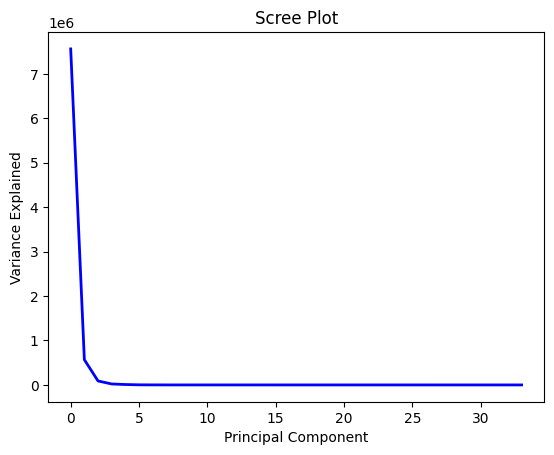

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def singular_values (X, scale = False):
    if scale:
        X = (X - X.mean())/X.std()
        
    u, sigma, vt = svd(X)
    return sigma

sigma = singular_values(df_final)
plt.plot(sigma, linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()